<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to Pandas Grouping

_Authors: Kiefer Katovich (SF), Dave Yerrington (SF), Mario Carrillo (SF)_

---

### Learning Objectives
*After this lesson, you will be able to:*
- Know what situations **grouping** is useful for
- Explain and use the **`.groupby()`** function in Pandas
- Demonstrate aggregation and plotting methods by groups in Pandas

### Lesson Guide

- [Overview of multi-dimensional data analysis](#overview)
- [Examples of when to group data](#grouping_examples)
- [Load the Titanic dataset](#load_titanic)
- [Introduction to pandas `.groupby()`](#groupby)
- [Grouping by multiple variables](#groupby_multiple)
- [Removing the hierarchical index](#removing_hierarchical)
- [Applying custom functions with apply](#custom_functions)
- [Plotting basic histograms with groups](#basic_plotting)
- [Grouped histograms](#grouped_hists)
- [Independent practice](#independent_practice)


<a id='overview'></a>

### Overview of multi-dimensional data analysis

---

- Describe segments of your data based on unique values
- Understand characteristics of your data
   - Summary statistics across subsets
   - Discover patterns that exist in some subsets but not others
- Finding duplicate values or redundant data
- Apply aggregate functions to subsets


<a id='grouping_examples'></a>

### Analyzing data by group: some specific examples

---

 - Sum of crimes by time of day in SF (morning, afternoon, night)
 - Count number of people with the same last name
 - Median number of multi-unit buildings in a region
 - Popularity of movie genres by region
 - Segmenting customers based on age, buying habbits, interests, behavior
 - Using the "GROUP BY" clause in a database query using SQL

#### Subset aggregation:

This chart stratifies a single variable "Industry", **counting** job openings within category.

![](http://www.rasmussen.edu/images/blogs/1360270834-402_Graphs_JobOpeningsByIndustry.jpg)

#### Hierarchical aggregation

This chart aggregates first by a top level group, "industry", and then a secondary group "date" within each industry

![](http://junkcharts.typepad.com/.a/6a00d8341e992c53ef0192acc65090970d-pi)

<a id='load_titanic'></a>

### Exploring the Titanic dataset with grouping

---

To explore the power of grouping with pandas we will be using [the famous Titanic dataset that can be downloaded from Kaggle](https://www.kaggle.com/c/titanic). From the competition decription:

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Though we will not be doing any modeling of survival rates in this lesson, there are interesting patterns to be found just by exploring descriptive statistics in cross-sections of the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

**Load the data into pandas.**

In [3]:
path_to_file = './datasets/titanic_clean.csv'
titanic = pd.read_csv(path_to_file)

The data contains a variety of information about passengers involved in the sinking of the Titanic.

**Describe the data in the columns with summary statistics.**

In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [39]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [40]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

<a id='groupby'></a>

### Intro to `.groupby()` in pandas

---

The built-in `.groupby()` functions for dataframes is one of the most useful tools in pandas. As the name implies, `.groupby` will group your dataset by one or more user-specified column names. Typically you will apply basic statistical functions to the grouped data with built-in functions. 

We can get the mean, median, count, and max of the columns by group. 

**Using `.groupby`, create a grouped dataframe where the titanic dataset is grouped by "Pclass". Try appending these built in functions on the grouped data.**

In [62]:
titanic.groupby("Pclass").count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,,,,,,,,,
1,184,184,184,184,184,184,184,184,184
2,173,173,173,173,173,173,173,173,173
3,355,355,355,355,355,355,355,355,355


In [ ]:
# syntax is roughly df.groupby(group_col)[by_col].built_in_function()


<a id='groupby_multiple'></a>

### Grouping by multiple fields

---

Grouping by more than one column is simple. The `.groupby()` function can take a list of column names to group by. When you group by more than one column, each subset of the data will correspond to one of the distinct combinations of the grouping columns.

**Create a grouped dataframe by grouping the titanic data by "Pclass" and "Survived" and appending built in functions to the data.**

In [42]:
titanic.groupby(["Pclass","Sex"])[["Fare","Survived"]].mean()

Fare  Survived
Pclass Sex                         
1      female  108.619680  0.963855
       male     71.142781  0.396040
2      female   21.951070  0.918919
       male     21.113131  0.151515
3      female   15.875369  0.460784
       male     12.162695  0.150198

You can also operate on single columns or subsets of columns across grouped dataframes using the indexing syntax for standard dataframes.

**Find the percent of passengers who survived by where they embarked.**

In [43]:
titanic.groupby(["Embarked"])["Survived"].mean()

Embarked
C    0.607692
Q    0.285714
S    0.362816
Name: Survived, dtype: float64

**Find the average fare and age grouped by the location embarked and the class.**

In [36]:
titanic.groupby(["Embarked","Pclass"])[["Fare","Age"]].mean()

Fare        Age
Embarked Pclass                       
C        1       108.246399  38.027027
         2        26.811947  22.766667
         3        11.369927  20.741951
Q        1        90.000000  38.500000
         2        12.350000  43.500000
         3        12.780904  25.937500
S        1        74.172415  38.152037
         2        21.075000  30.386731
         3        13.529451  25.696552

In [37]:
titanic.groupby(["Embarked","Pclass"])["Age"].mean()

Embarked  Pclass
C         1         38.027027
          2         22.766667
          3         20.741951
Q         1         38.500000
          2         43.500000
          3         25.937500
S         1         38.152037
          2         30.386731
          3         25.696552
Name: Age, dtype: float64

<a id='removing_hierarchical'></a>

### Removing the hierarchical index

---

By default pandas will give you back your groups in a hierarchical index format. If this is not preferable to you, you can use the `.reset_index()` function to take your row labels and convert them into columns.

**Remove the hierarchical index for the average fare and age dataset you just created, converting Embarked and Pclass to columns.**

In [44]:
titanic.groupby(["Embarked","Pclass"])[["Fare","Age"]].mean().reset_index()

,Embarked,Pclass,Fare,Age
0,C,1,108.246399,38.027027
1,C,2,26.811947,22.766667
2,C,3,11.369927,20.741951
3,Q,1,90.000000,38.500000
4,Q,2,12.350000,43.500000
5,Q,3,12.780904,25.937500
6,S,1,74.172415,38.152037
7,S,2,21.075000,30.386731
8,S,3,13.529451,25.696552


<a id='custom_functions'></a>

### Applying your own functions to groups with `.apply()`

---

While pandas does contain a variety of useful built-in summary functions, it is common that you will need to apply a custom function to the data in your groups. 

The `.apply()` function takes a function as an argument and applies it to the subsets of data in your dataframe groups.

**See what happens when you replace the built-in `.mean()` function with a `.apply(np.mean)` for the question above.**

In [45]:
titanic.groupby(["Embarked","Pclass"])[["Fare","Age"]].apply(np.mean).reset_index()

,Embarked,Pclass,Fare,Age
0,C,1,108.246399,38.027027
1,C,2,26.811947,22.766667
2,C,3,11.369927,20.741951
3,Q,1,90.000000,38.500000
4,Q,2,12.350000,43.500000
5,Q,3,12.780904,25.937500
6,S,1,74.172415,38.152037
7,S,2,21.075000,30.386731
8,S,3,13.529451,25.696552


Say we wanted to have the mean of fare and age per embarked and pclass, but we wanted the numbers to be rounded. One way to do this would be to round the columns after we had applied the mean function as we did above. 

Another way would be to write a custom function to pass into apply. *The function passed to `.apply()` will be run on all of the subsets of data.*

**Write a function that will take the mean of columns in a dataset and round the values.**

In [53]:
def do_some_rounding (column):
    column = column.mean()
    column = column.round()

    return column


**Apply your custom function to the grouped data.**

In [55]:
titanic.groupby(["Embarked","Pclass"])[["Fare","Age"]].apply(do_some_rounding).reset_index()

,Embarked,Pclass,Fare,Age
0,C,1,108.0,38.0
1,C,2,27.0,23.0
2,C,3,11.0,21.0
3,Q,1,90.0,38.0
4,Q,2,12.0,44.0
5,Q,3,13.0,26.0
6,S,1,74.0,38.0
7,S,2,21.0,30.0
8,S,3,14.0,26.0


<a id='basic_plotting'></a>

### Basic pandas histograms with grouped data

---

We can leverage the power of pandas even more by mixing its plotting capabilities with its grouping capabilities.

**First find the number of passengers per PClass by using `.groupby` and `.size`.**

In [69]:
titanic.groupby("Pclass").size()

Pclass
1    184
2    173
3    355
dtype: int64

Here we have a series object with the counts of passengers per class group. It is simple to get a histogram of these counts by appending `.plot(kind="bar", color="g", width=0.85)`

<AxesSubplot:xlabel='Pclass'>

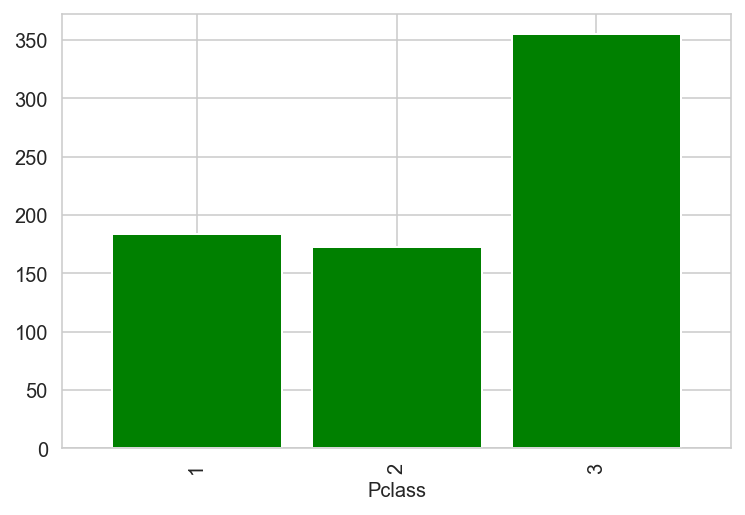

In [68]:
titanic.groupby(["Pclass"]).size().plot(kind="bar", color="g", width=0.85)

**Plot the average fare per sex and class as a histogram.**

<AxesSubplot:xlabel='Sex,Pclass'>

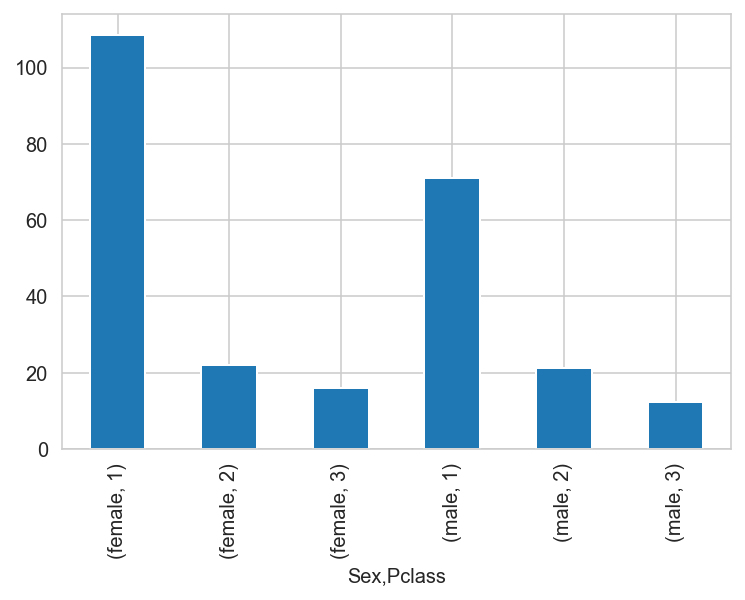

In [71]:
titanic.groupby(["Sex","Pclass"])["Fare"].mean().plot(kind="bar")

<a id='grouped_hists'></a>

### Grouped histograms with pandas

---

In the chart we just made, each bar represents a distinct combination of our groups in the `.groupby`. This is fine, but it would be a more visually appealing and informative chart if we had one of the groups as different colors and could make a grouped bar chart.

**Calculate the mean of Fare by Pclass and Sex using `groupby`, assign it to a variable, and print it out.**

In [73]:
testvariable = titanic.groupby(["Sex","Pclass"])["Fare"].mean()
print(testvariable)

Sex     Pclass
female  1         108.619680
        2          21.951070
        3          15.875369
male    1          71.142781
        2          21.113131
        3          12.162695
Name: Fare, dtype: float64


There is another built-in function for pandas objects called `.unstack()`. When we have a hierarchical index like we do above with Pclass as the broader category and Sex as the sub-category, the `.unstack()` command will attempt to move the subcategory from an index to column representation.

This is a way to move from a "long" to "wide" column format.

**Use the `.unstack()` function on your mean fare variable.**

In [74]:
testvariable.unstack()

Pclass,1,2,3
Sex,,,
female,108.619680,21.951070,15.875369
male,71.142781,21.113131,12.162695


**Now use the plot function on the unstacked data to create a bar chart.**

<AxesSubplot:xlabel='Sex'>

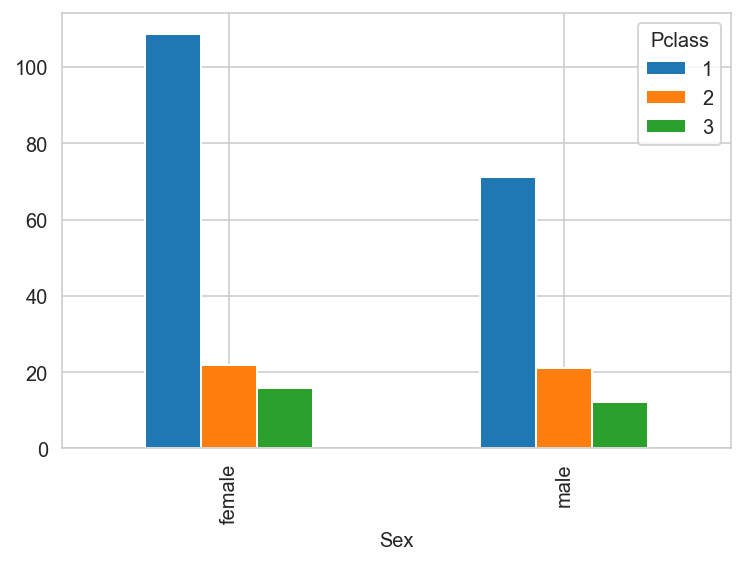

In [78]:
testvariable.unstack().plot(kind="bar")

If you add the keyword variable `stacked=True` it will instead stack the bars within the broader Pclass category.

<AxesSubplot:xlabel='Sex'>

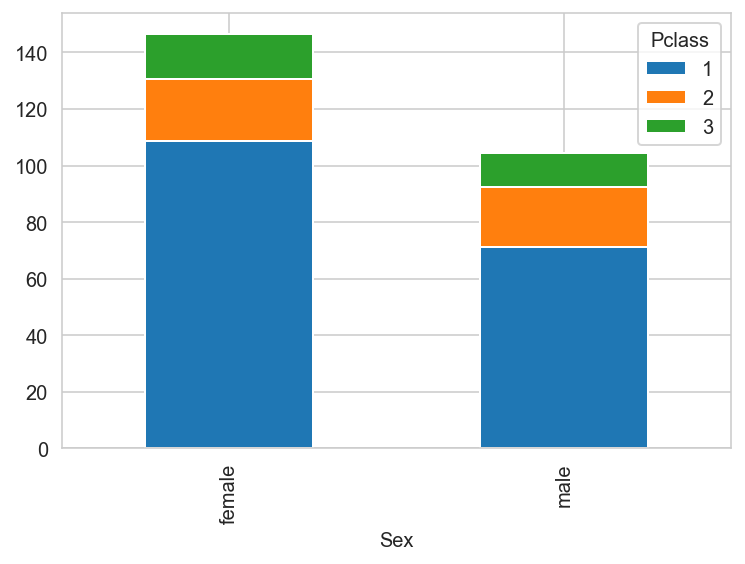

In [80]:
testvariable.unstack().plot(kind="bar",stacked=True)

<a id='independent_practice'></a>

### Independent practice with grouping

---

Now that you've covered the basics of grouping, applying functions and aggregating data, and pandas plotting with grouped data, [open up the practice notebook and explore the UFO sightings data!](./practice_pandas_grouping.ipynb)